In [1]:
import numpy as np
import fbu
myfbu = fbu.PyFBU()

In [2]:
#myfbu.data = [100,150]
#myfbu.response = [[0.08,0.02], #first truth bin
#                  [0.02,0.08]] #second truth bin
#myfbu.lower = [0,0]
#myfbu.upper = [3000,3000]

myfbu.data = [100]
myfbu.response = [[0.08]]
myfbu.lower = [100]
myfbu.upper = [10000]
myfbu.nCores = 2
myfbu.nuts_kwargs={'target_accept':0.95}

In [3]:
#myfbu.objsyst = {
#    'signal':{'syst1':[0.2,0.2]}
#}

myfbu.objsyst = {
    'signal':{'syst1':[-0.2]}
}

In [41]:
myfbu.run()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


{'target_accept': 0.95}


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [gaus_syst1, truth0]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:11<00:00, 1904.10draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Elapsed 0:00:12 (1782.85 samples/second)


In [42]:
nptrace = myfbu.nuisancestrace
trace = myfbu.trace
print(np.mean(trace[0]))
print(np.std(trace[0]))

1401.4004733233162
396.19209093882984


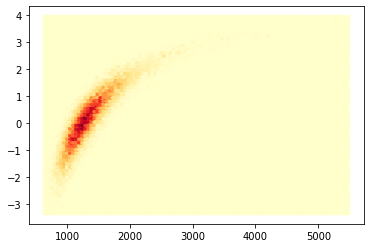

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.hexbin(trace[0],nptrace['syst1'],cmap=plt.cm.YlOrRd)

mode = 1202.5411497976079
mean = 1401.4004733233162


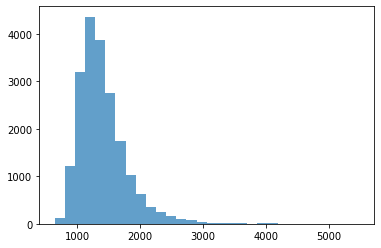

In [44]:
hist = plt.hist(trace[0], 30, label='posterior', alpha=0.7)
mode = (hist[1][np.where(hist[0] == np.amax(hist[0]))[0][0]] + hist[1][np.where(hist[0] == np.amax(hist[0]))[0][0] + 1]) / 2
print('mode = {}'.format(mode))
print('mean = {}'.format(np.mean(trace[0])))

mode = 0.42070209450844276
mean = 0.2368083532060037


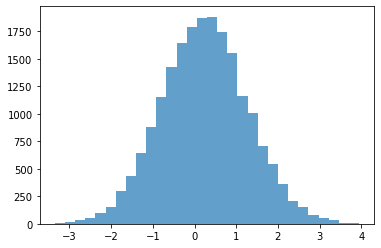

In [45]:
nphist = plt.hist(nptrace['syst1'],bins=30, alpha=0.7)
npmode = (nphist[1][np.where(nphist[0] == np.amax(nphist[0]))[0][0]] + nphist[1][np.where(nphist[0] == np.amax(nphist[0]))[0][0] + 1]) / 2
print('mode = {}'.format(npmode))
print('mean = {}'.format(np.mean(nptrace['syst1'])))